<a href="https://colab.research.google.com/github/mdyasirimran/Customer-Churn-Prediction-/blob/main/Customer_Churn_Prediction_MdYasirImran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

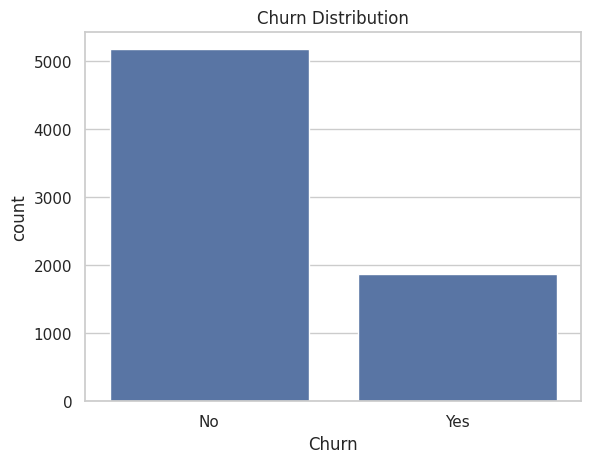

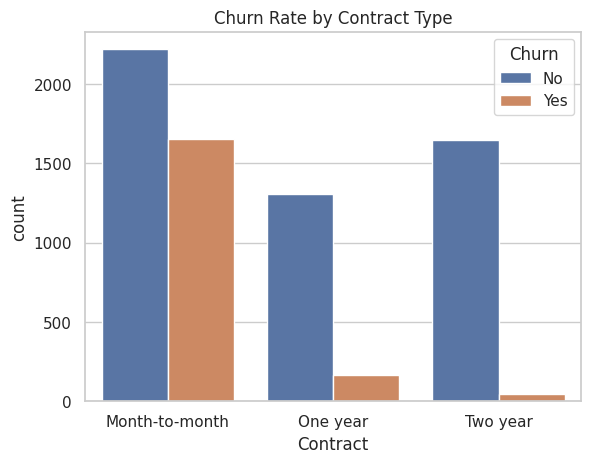

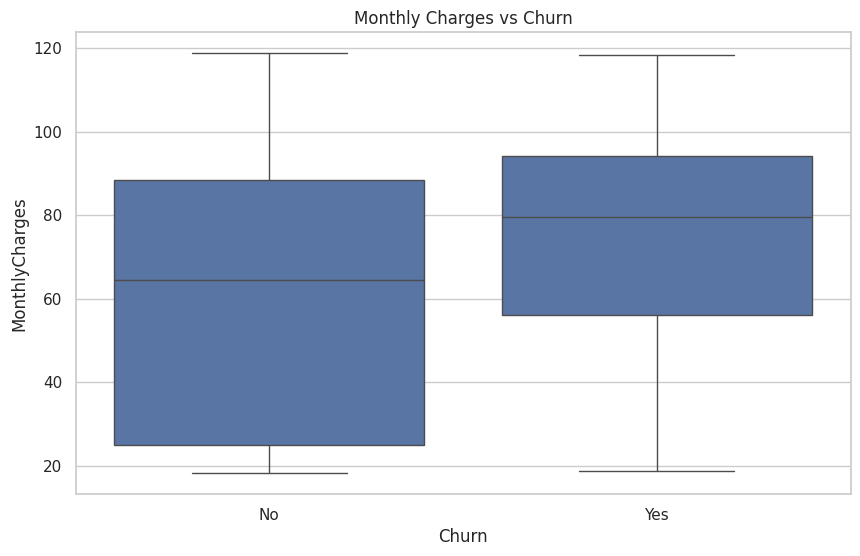

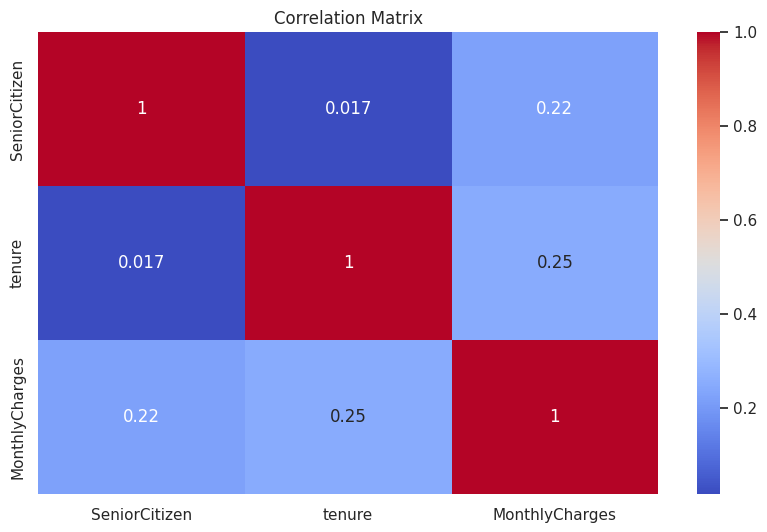

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for clean plots
sns.set(style="whitegrid")

#loading the dataset
df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
print(df.head())

#basic data summary
print(df.info())
print(df.describe())
print(df.isnull().sum())

#value counts of Categorical Variables
print("Churn counts:\n", df['Churn'].value_counts())
print("Contract counts:\n", df['Contract'].value_counts())

#visualizing the target variable
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

#checking how contract affects churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

#analysing monthly charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

#correlation analysis for numerical columns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#using groupby for aggregated insights
print(df.groupby('Contract')['Churn'].value_counts(normalize=True))


df.to_csv("cleaned_dataset2.csv", index=False)

✅ Loaded dataset with columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

🔷 Decision Tree:
Accuracy: 0.8026969481902059
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1036
         Yes       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409


🔷 Gradient Boosting:
Accuracy: 0.8161816891412349
              precision    recall  f1-score   support

          No       0.85      0.92      0.88      1036
         Yes       0.70      0.53      0.61       373

    accuracy                           0.82      1409
  

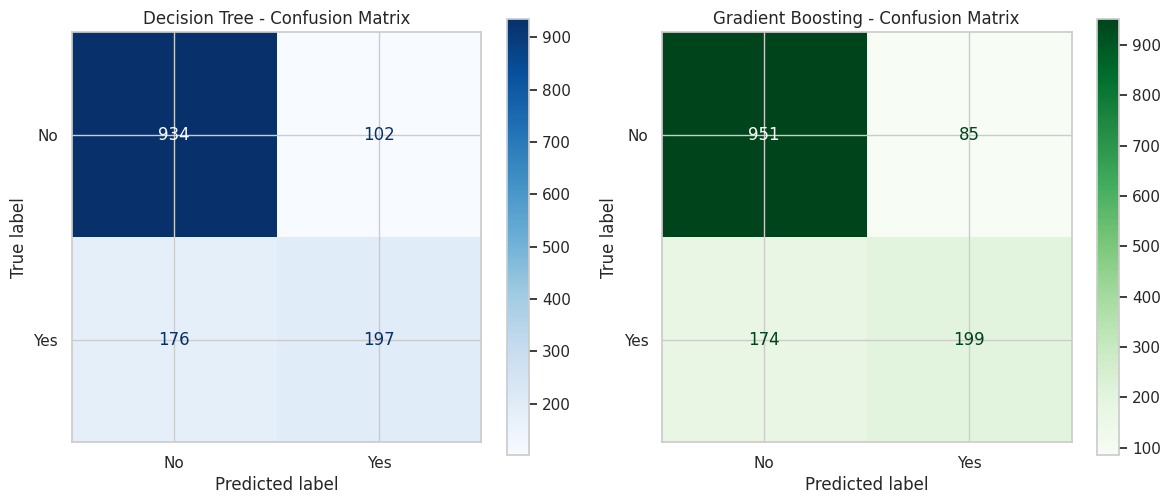

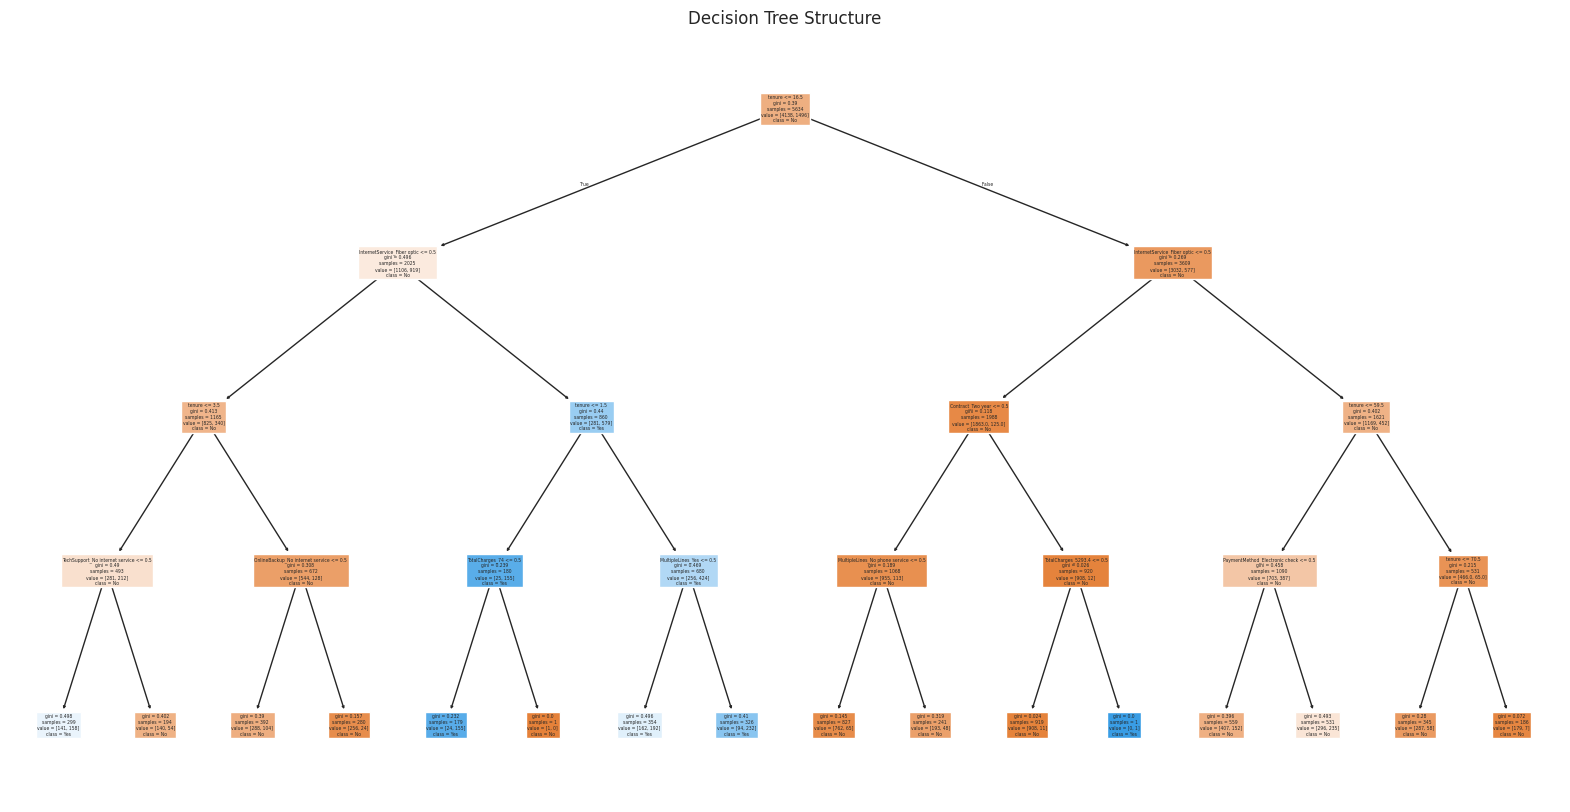

/tmp/ipython-input-5-1074954040.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.values[:10], y=feature_imp.index[:10], palette='magma')


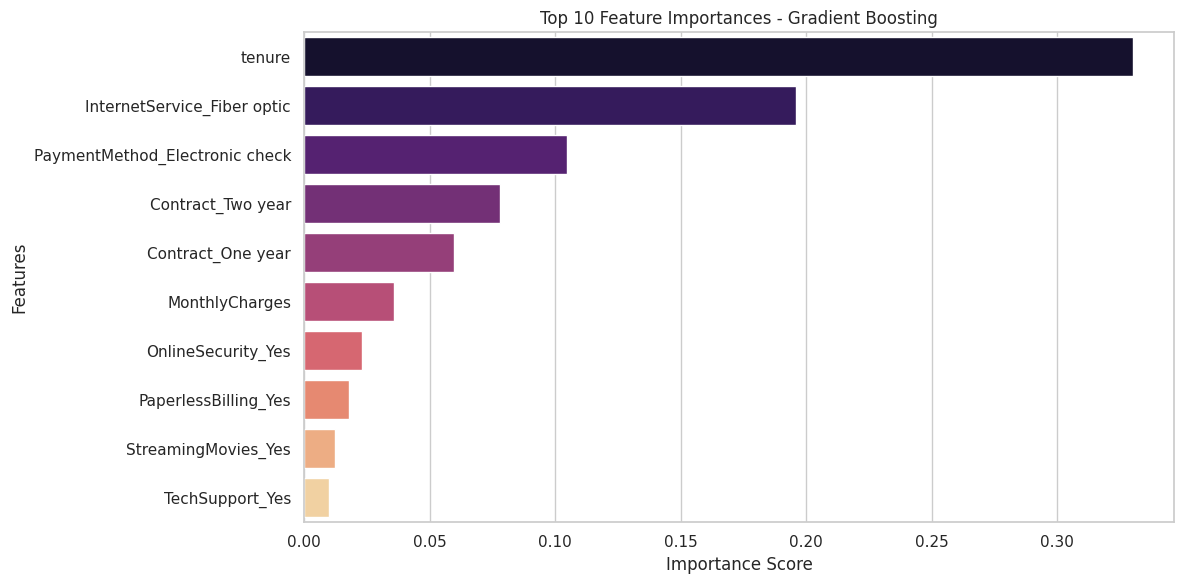


🔍 Starting Grid Search...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
⏱️ Grid Search completed in 103.99 seconds
✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

📊 Optimized Model Evaluation:
Accuracy: 0.8147622427253371
              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.70      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay
)

# ------------------------
# Step 1: Load and Prepare Data
# ------------------------
df = pd.read_csv("cleaned_dataset2.csv")
print("✅ Loaded dataset with columns:", df.columns.tolist())

y = df['Churn']
X = df.drop(['Churn', 'customerID'], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# ------------------------
# Step 2: Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------
# Step 3: Train Initial Models
# ------------------------

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# ------------------------
# Step 4: Evaluate Initial Models
# ------------------------
print("\n🔷 Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\n🔷 Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("Decision Tree - Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test, ax=axes[1], cmap='Greens')
axes[1].set_title("Gradient Boosting - Confusion Matrix")

plt.tight_layout()
plt.show()

# ------------------------
# Step 5: Visualizations
# ------------------------

# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Structure")
plt.show()

# Feature Importance
feature_imp = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_imp.values[:10], y=feature_imp.index[:10], palette='magma')
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ------------------------
# Step 6: Hyperparameter Tuning with GridSearchCV
# ------------------------
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n🔍 Starting Grid Search...")
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(f"⏱️ Grid Search completed in {end - start:.2f} seconds")

best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# ------------------------
# Step 7: Final Evaluation
# ------------------------
y_pred_best = best_model.predict(X_test)
print("\n📊 Optimized Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))




✅ Loaded dataset with columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

🔍 Starting model training and hyperparameter tuning...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
⏱️ Randomized Search completed in 304.27 seconds

✅ Best Parameters:
{'max_iter': 100, 'max_depth': 7, 'learning_rate': 0.05}

📊 Model Evaluation:
Accuracy: 0.8090844570617459
              precision    recall  f1-score   support

          No       0.84      0.91      0.88      1036
         Yes       0.68      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



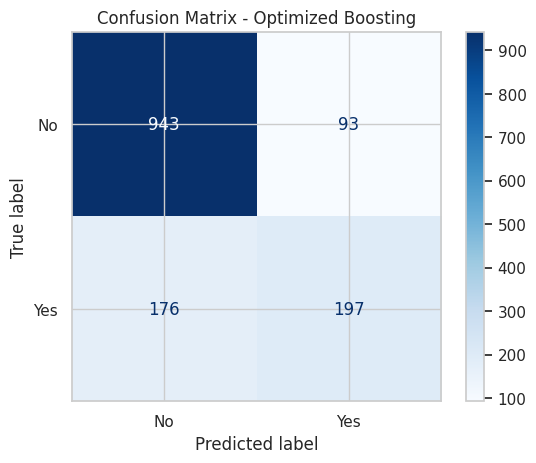

⚠️ Feature importances not available for HistGradientBoostingClassifier.
💾 Model saved as 'best_hist_gradient_boosting_model.pkl'


/tmp/ipython-input-6-715904406.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


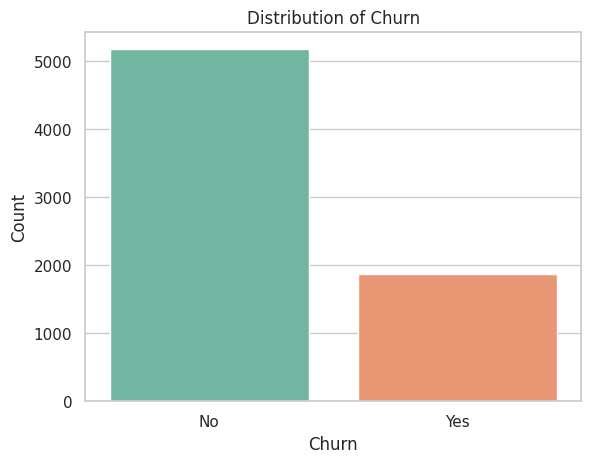

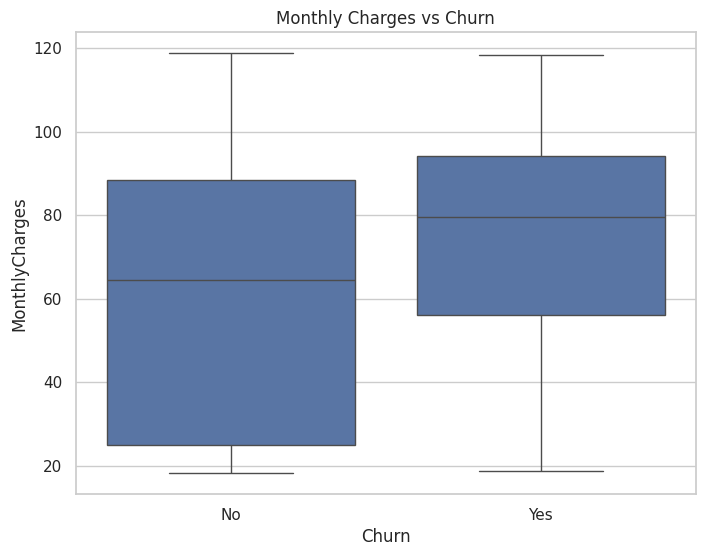

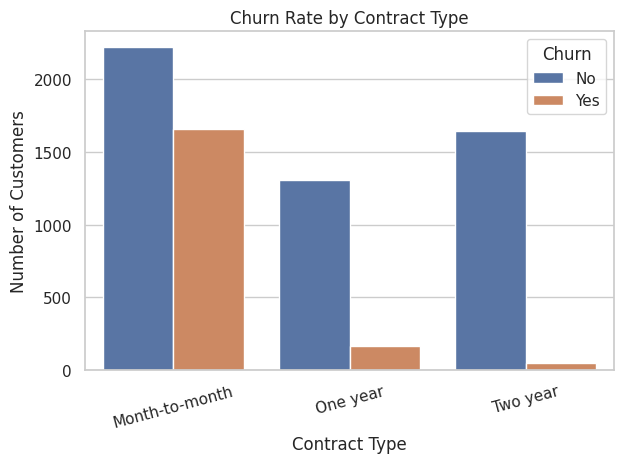

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay
)

# ------------------------
# Step 1: Load and Prepare Data
# ------------------------
df = pd.read_csv("cleaned_dataset2.csv")
print("✅ Loaded dataset with columns:", df.columns.tolist())

# Separate features and target
y = df['Churn']
X = df.drop(['Churn', 'customerID'], axis=1)

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# ------------------------
# Step 2: Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------
# Step 3: Hyperparameter Optimization (RandomizedSearchCV)
# ------------------------
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 150, 200],
    'max_depth': [3, 5, 7]
}

random_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n🔍 Starting model training and hyperparameter tuning...")
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

print(f"⏱️ Randomized Search completed in {end_time - start_time:.2f} seconds")
print("\n✅ Best Parameters:")
print(random_search.best_params_)

best_model = random_search.best_estimator_

# ------------------------
# Step 4: Evaluate Model
# ------------------------
y_pred = best_model.predict(X_test)

print("\n📊 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Optimized Boosting")
plt.show()

# ------------------------
# Step 5: Feature Importance (Manual Approximation)
# ------------------------
try:
    feature_importance = pd.Series(
        best_model.feature_importances_, index=X.columns
    ).sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='magma')
    plt.title("Top 10 Feature Importances - Optimized Model")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()
except AttributeError:
    print("⚠️ Feature importances not available for HistGradientBoostingClassifier.")

# ------------------------
# Step 6: Save Best Model
# ------------------------
joblib.dump(best_model, "best_hist_gradient_boosting_model.pkl")
print("💾 Model saved as 'best_hist_gradient_boosting_model.pkl'")

# ------------------------
# Step 7: Data Visualization
# ------------------------
# Distribution of Churn
sns.countplot(x=y, palette='Set2')
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Monthly Charges vs Churn
df_plot = X.copy()
df_plot['Churn'] = y.values

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_plot)
plt.title("Monthly Charges vs Churn")
plt.show()

# Churn Rate by Contract Type (if original 'Contract' column exists)
if 'Contract' in df.columns:
    sns.countplot(x='Contract', hue='Churn', data=df)
    plt.title("Churn Rate by Contract Type")
    plt.xlabel("Contract Type")
    plt.ylabel("Number of Customers")
    plt.legend(title='Churn')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ 'Contract' column not found in original dataset.")

